Linear

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


Import thư viện cần thiết

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from IPython.display import Markdown, display
import re

Tải và chạy Bitcoin Data



In [4]:
# Đọc dữ liệu từ file CSV
data = pd.read_csv('Bitcoin Historical Data.csv')

# Chuyển cột 'Date' sang định dạng datetime để dễ xử lý thời gian
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

# Đảm bảo cột 'Price' có kiểu float (phòng trường hợp có định dạng chuỗi)
data['Price'] = data['Price'].astype(str).str.replace(',', '').astype(float)

# Sắp xếp dữ liệu theo ngày tăng dần và reset lại chỉ mục
data = data.sort_values('Date').reset_index(drop=True)

Bitcoin Data với tỷ lệ chia 7/3

In [5]:
# Chia dữ liệu:
train = data.iloc[:int(len(data) * 0.7)]
test = data.iloc[int(len(data) * 0.7):]

In [6]:
# Tạo và huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(np.array(train.index).reshape(-1, 1), train['Price'])

LinearRegression()

In [7]:
# Dự đoán giá trên tập test
predictions = model.predict(np.array(test.index).reshape(-1, 1))

In [8]:
# Dự báo 30 ngày tiếp theo kể từ ngày cuối cùng trong tập test
future_dates_30 = pd.date_range(start=test['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_predictions_30 = model.predict(np.array(np.arange(test.index[-1] + 1, test.index[-1] + 31)).reshape(-1, 1))

# Dự báo từ ngày thứ 31 đến ngày thứ 60 sau test
future_dates_60 = pd.date_range(start=test['Date'].iloc[-1] + pd.Timedelta(days=31), periods=30, freq='D')
future_predictions_60 = model.predict(np.array(np.arange(test.index[-1] + 31, test.index[-1] + 61)).reshape(-1, 1))

# Dự báo từ ngày thứ 61 đến 90 sau test
future_dates_90 = pd.date_range(start=test['Date'].iloc[-1] + pd.Timedelta(days=61), periods=30, freq='D')
future_predictions_90 = model.predict(np.array(np.arange(test.index[-1] + 61, test.index[-1] + 91)).reshape(-1, 1))

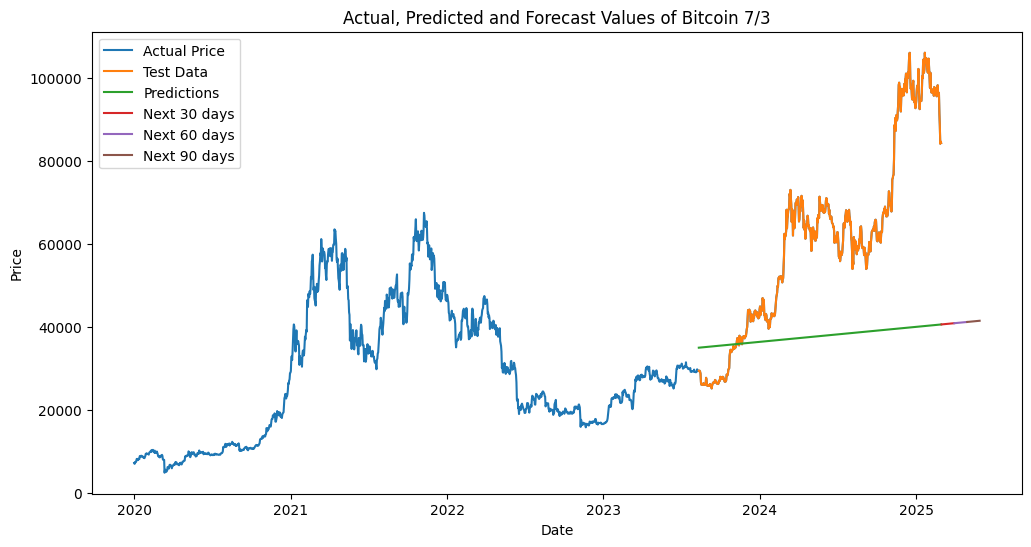

In [9]:
plt.figure(figsize=(12, 6))

# Vẽ dữ liệu thực tế
plt.plot(data['Date'], data['Price'], label='Actual Price')

# Vẽ dữ liệu test
plt.plot(test['Date'], test['Price'], label='Test Data')

# Vẽ kết quả dự đoán trên tập test
plt.plot(test['Date'], predictions, label='Predictions')

# Vẽ 3 giai đoạn dự báo tiếp theo
plt.plot(future_dates_30, future_predictions_30, label='Next 30 days')
plt.plot(future_dates_60, future_predictions_60, label='Next 60 days')
plt.plot(future_dates_90, future_predictions_90, label='Next 90 days')

# Các thuộc tính đồ thị
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual, Predicted and Forecast Values of Bitcoin 7/3')
plt.legend()
plt.show()

In [10]:
# RMSE: Sai số bình phương trung bình (căn bậc 2)
rmse = np.sqrt(mean_squared_error(test['Price'], predictions))

# MAPE: Sai số phần trăm tuyệt đối trung bình
mape = np.mean(np.abs((test['Price'] - predictions) / test['Price'])) * 100

# MSE: Sai số bình phương trung bình
mse = mean_squared_error(test['Price'], predictions)

# In kết quả
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"MSE: {mse:.4f}")

RMSE: 31244.6254
MAPE: 36.58%
MSE: 976226617.6223


Bitcoin Data với tỷ lệ chia 8/2

In [11]:
# Chia dữ liệu:
train = data.iloc[:int(len(data) * 0.8)]
test = data.iloc[int(len(data) * 0.8):]

In [12]:
# Tạo và huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(np.array(train.index).reshape(-1, 1), train['Price'])

LinearRegression()

In [13]:
# Dự đoán giá trên tập test
predictions = model.predict(np.array(test.index).reshape(-1, 1))

In [14]:
# Dự báo 30 ngày tiếp theo kể từ ngày cuối cùng trong tập test
future_dates_30 = pd.date_range(start=test['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_predictions_30 = model.predict(np.array(np.arange(test.index[-1] + 1, test.index[-1] + 31)).reshape(-1, 1))

# Dự báo từ ngày thứ 31 đến ngày thứ 60 sau test
future_dates_60 = pd.date_range(start=test['Date'].iloc[-1] + pd.Timedelta(days=31), periods=30, freq='D')
future_predictions_60 = model.predict(np.array(np.arange(test.index[-1] + 31, test.index[-1] + 61)).reshape(-1, 1))

# Dự báo từ ngày thứ 61 đến 90 sau test
future_dates_90 = pd.date_range(start=test['Date'].iloc[-1] + pd.Timedelta(days=61), periods=30, freq='D')
future_predictions_90 = model.predict(np.array(np.arange(test.index[-1] + 61, test.index[-1] + 91)).reshape(-1, 1))

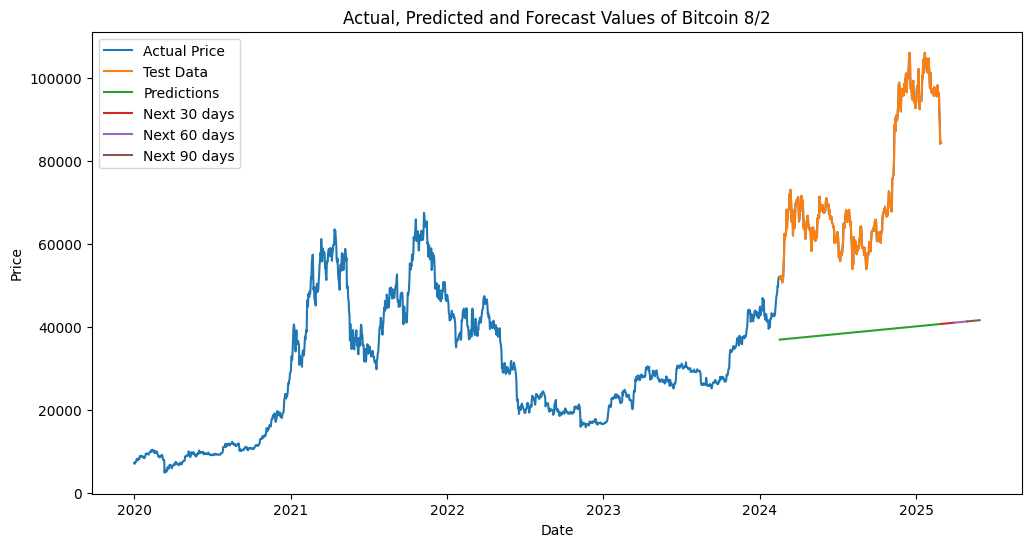

In [15]:
plt.figure(figsize=(12, 6))
# Vẽ dữ liệu thực tế
plt.plot(data['Date'], data['Price'], label='Actual Price')

# Vẽ dữ liệu test
plt.plot(test['Date'], test['Price'], label='Test Data')

# Vẽ kết quả dự đoán trên tập test
plt.plot(test['Date'], predictions, label='Predictions')

# Vẽ 3 giai đoạn dự báo tiếp theo
plt.plot(future_dates_30, future_predictions_30, label='Next 30 days')
plt.plot(future_dates_60, future_predictions_60, label='Next 60 days')
plt.plot(future_dates_90, future_predictions_90, label='Next 90 days')

# Các thuộc tính đồ thị
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual, Predicted and Forecast Values of Bitcoin 8/2')
plt.legend()
plt.show()

In [16]:
# RMSE: Sai số bình phương trung bình (căn bậc 2)
rmse = np.sqrt(mean_squared_error(test['Price'], predictions))

# MAPE: Sai số phần trăm tuyệt đối trung bình
mape = np.mean(np.abs((test['Price'] - predictions) / test['Price'])) * 100

# MSE: Sai số bình phương trung bình
mse = mean_squared_error(test['Price'], predictions)

# In kết quả
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"MSE: {mse:.4f}")

RMSE: 37855.6649
MAPE: 45.22%
MSE: 1433051368.3264


Bitcoin Data với tỷ lệ chia 9/1

In [17]:
# Chia dữ liệu:
train = data.iloc[:int(len(data) * 0.9)]
test = data.iloc[int(len(data) * 0.9):]

In [18]:
# Tạo và huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(np.array(train.index).reshape(-1, 1), train['Price'])

LinearRegression()

In [19]:
# Dự đoán giá trên tập test
predictions = model.predict(np.array(test.index).reshape(-1, 1))

# Dự báo 30 ngày tiếp theo kể từ ngày cuối cùng trong tập test
future_dates_30 = pd.date_range(start=test['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_predictions_30 = model.predict(np.array(np.arange(test.index[-1] + 1, test.index[-1] + 31)).reshape(-1, 1))

# Dự báo từ ngày thứ 31 đến ngày thứ 60 sau test
future_dates_60 = pd.date_range(start=test['Date'].iloc[-1] + pd.Timedelta(days=31), periods=30, freq='D')
future_predictions_60 = model.predict(np.array(np.arange(test.index[-1] + 31, test.index[-1] + 61)).reshape(-1, 1))

# Dự báo từ ngày thứ 61 đến 90 sau test
future_dates_90 = pd.date_range(start=test['Date'].iloc[-1] + pd.Timedelta(days=61), periods=30, freq='D')
future_predictions_90 = model.predict(np.array(np.arange(test.index[-1] + 61, test.index[-1] + 91)).reshape(-1, 1))

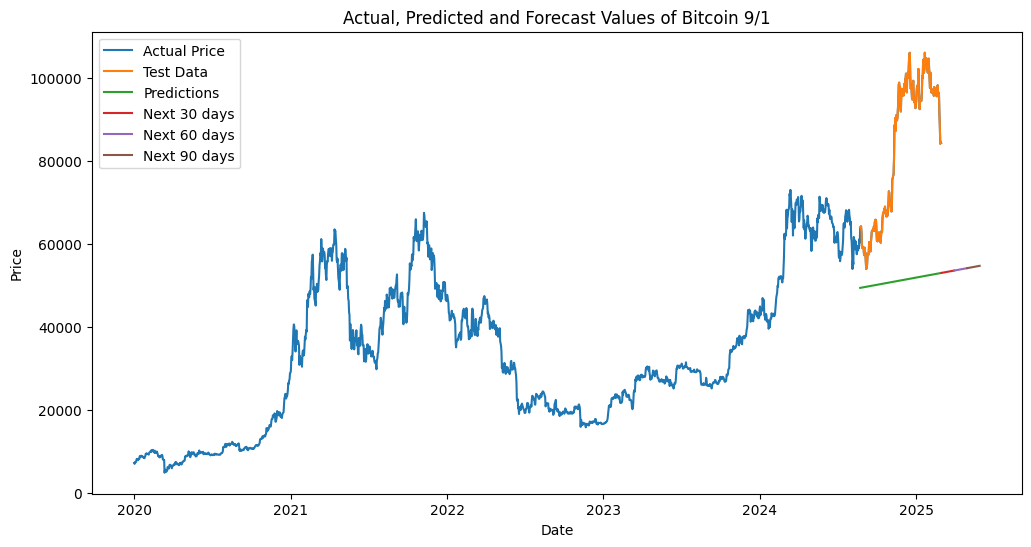

In [20]:
plt.figure(figsize=(12, 6))

# Vẽ dữ liệu thực tế
plt.plot(data['Date'], data['Price'], label='Actual Price')

# Vẽ dữ liệu test
plt.plot(test['Date'], test['Price'], label='Test Data')

# Vẽ kết quả dự đoán trên tập test
plt.plot(test['Date'], predictions, label='Predictions')

# Vẽ 3 giai đoạn dự báo tiếp theo
plt.plot(future_dates_30, future_predictions_30, label='Next 30 days')
plt.plot(future_dates_60, future_predictions_60, label='Next 60 days')
plt.plot(future_dates_90, future_predictions_90, label='Next 90 days')

# Các thuộc tính đồ thị
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual, Predicted and Forecast Values of Bitcoin 9/1')
plt.legend()
plt.show()

In [21]:
# RMSE: Sai số bình phương trung bình (căn bậc 2)
rmse = np.sqrt(mean_squared_error(test['Price'], predictions))

# MAPE: Sai số phần trăm tuyệt đối trung bình
mape = np.mean(np.abs((test['Price'] - predictions) / test['Price'])) * 100

# MSE: Sai số bình phương trung bình
mse = mean_squared_error(test['Price'], predictions)

# In kết quả
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"MSE: {mse:.4f}")

RMSE: 35774.3116
MAPE: 35.70%
MSE: 1279801369.5197


Tải và chạy Ethereum Data

In [22]:
# Đọc dữ liệu từ file CSV
data_1 = pd.read_csv('Ethereum Historical Data.csv')

In [23]:
# Chuyển cột 'Date' sang định dạng datetime để dễ xử lý thời gian
data_1['Date'] = pd.to_datetime(data_1['Date'], format='%m/%d/%Y')

In [24]:
# Đảm bảo cột 'Price' có kiểu float (phòng trường hợp có định dạng chuỗi)
data_1['Price'] = data_1['Price'].astype(str).str.replace(',', '').astype(float)

In [25]:
# Sắp xếp dữ liệu theo ngày tăng dần và reset lại chỉ mục
data_1 = data_1.sort_values('Date').reset_index(drop=True)

Ethereum Data với tỷ lệ chia 7/3

In [26]:
# Chia dữ liệu:
train1 = data_1.iloc[:int(len(data_1) * 0.7)]
test1 = data_1.iloc[int(len(data_1) * 0.7):]

In [27]:
# Tạo và huấn luyện mô hình hồi quy tuyến tính
model1 = LinearRegression()
model1.fit(np.array(train1.index).reshape(-1, 1), train1['Price'])

LinearRegression()

In [28]:
# Dự đoán giá trên tập test
predictions_1 = model1.predict(np.array(test1.index).reshape(-1, 1))

In [29]:
# Dự báo 30 ngày tiếp theo kể từ ngày cuối cùng trong tập test
future_dates_30_1 = pd.date_range(start=test1['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_predictions_30_1 = model1.predict(np.array(np.arange(test1.index[-1] + 1, test1.index[-1] + 31)).reshape(-1, 1))

# Dự báo từ ngày thứ 31 đến ngày thứ 60 sau test
future_dates_60_1 = pd.date_range(start=test1['Date'].iloc[-1] + pd.Timedelta(days=31), periods=30, freq='D')
future_predictions_60_1 = model1.predict(np.array(np.arange(test1.index[-1] + 31, test1.index[-1] + 61)).reshape(-1, 1))

# Dự báo từ ngày thứ 61 đến 90 sau test
future_dates_90_1 = pd.date_range(start=test1['Date'].iloc[-1] + pd.Timedelta(days=61), periods=30, freq='D')
future_predictions_90_1 = model1.predict(np.array(np.arange(test1.index[-1] + 61, test1.index[-1] + 91)).reshape(-1, 1))

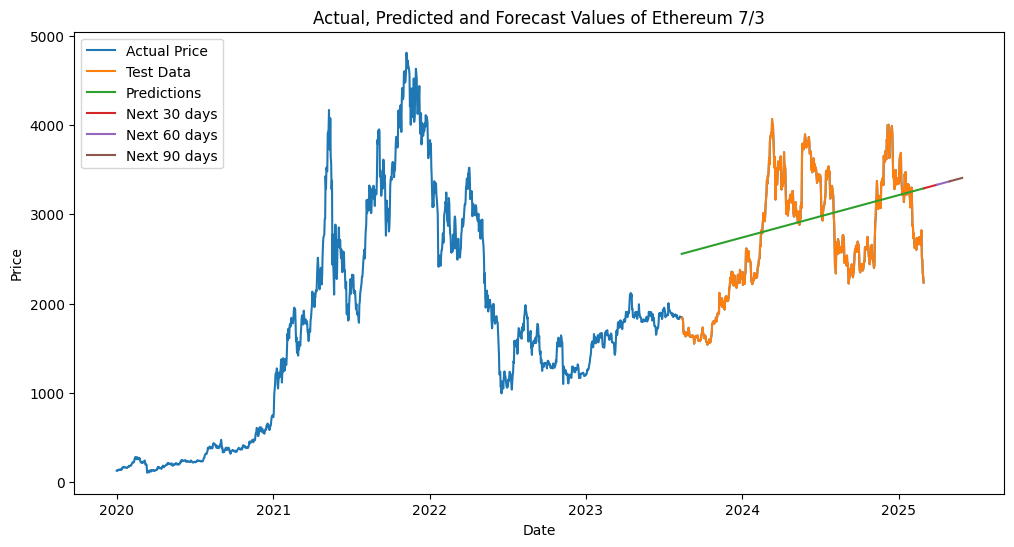

In [30]:
plt.figure(figsize=(12, 6))

# Vẽ dữ liệu thực tế
plt.plot(data_1['Date'], data_1['Price'], label='Actual Price')

# Vẽ dữ liệu test
plt.plot(test1['Date'], test1['Price'], label='Test Data')

# Vẽ kết quả dự đoán trên tập test
plt.plot(test1['Date'], predictions_1, label='Predictions')

# Vẽ 3 giai đoạn dự báo tiếp theo
plt.plot(future_dates_30_1, future_predictions_30_1, label='Next 30 days')
plt.plot(future_dates_60_1, future_predictions_60_1, label='Next 60 days')
plt.plot(future_dates_90_1, future_predictions_90_1, label='Next 90 days')

# Các thuộc tính đồ thị
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual, Predicted and Forecast Values of Ethereum 7/3')
plt.legend()
plt.show()

In [31]:
# RMSE: Sai số bình phương trung bình (căn bậc 2)
rmse1= np.sqrt(mean_squared_error(test1['Price'], predictions_1))

# MAPE: Sai số phần trăm tuyệt đối trung bình
mape1 = np.mean(np.abs((test1['Price'] - predictions_1) / test1['Price'])) * 100

# MSE: Sai số bình phương trung bình
mse1 = mean_squared_error(test1['Price'], predictions_1)

# In kết quả
print(f"RMSE: {rmse1:.4f}")
print(f"MAPE: {mape1:.2f}%")
print(f"MSE: {mse1:.4f}")

RMSE: 602.6425
MAPE: 22.31%
MSE: 363177.9623


Ethereum Data với tỷ lệ chia 8/2

In [32]:
# Chia dữ liệu:
train1 = data_1.iloc[:int(len(data_1) * 0.8)]
test1 = data_1.iloc[int(len(data_1) * 0.8):]

In [33]:
# Tạo và huấn luyện mô hình hồi quy tuyến tính
model1 = LinearRegression()
model1.fit(np.array(train1.index).reshape(-1, 1), train1['Price'])

LinearRegression()

In [34]:
# Dự đoán giá trên tập test
predictions_1 = model1.predict(np.array(test1.index).reshape(-1, 1))

In [35]:
# Dự báo 30 ngày tiếp theo kể từ ngày cuối cùng trong tập test
future_dates_30_1 = pd.date_range(start=test1['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_predictions_30_1 = model1.predict(np.array(np.arange(test1.index[-1] + 1, test1.index[-1] + 31)).reshape(-1, 1))

# Dự báo từ ngày thứ 31 đến ngày thứ 60 sau test
future_dates_60_1 = pd.date_range(start=test1['Date'].iloc[-1] + pd.Timedelta(days=31), periods=30, freq='D')
future_predictions_60_1 = model1.predict(np.array(np.arange(test1.index[-1] + 31, test1.index[-1] + 61)).reshape(-1, 1))

# Dự báo từ ngày thứ 61 đến 90 sau test
future_dates_90_1 = pd.date_range(start=test1['Date'].iloc[-1] + pd.Timedelta(days=61), periods=30, freq='D')
future_predictions_90_1 = model1.predict(np.array(np.arange(test1.index[-1] + 61, test1.index[-1] + 91)).reshape(-1, 1))

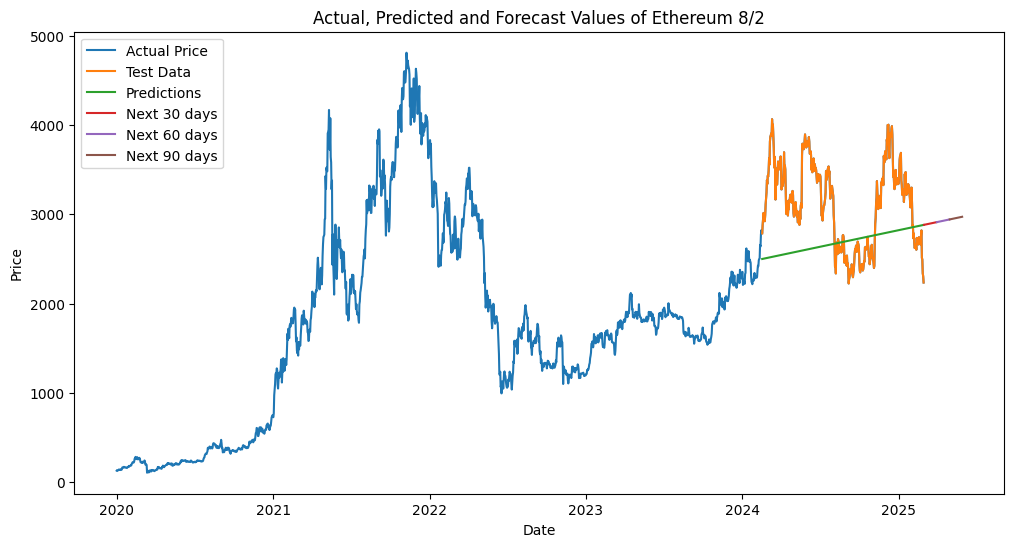

In [36]:
plt.figure(figsize=(12, 6))

# Vẽ dữ liệu thực tế
plt.plot(data_1['Date'], data_1['Price'], label='Actual Price')

# Vẽ dữ liệu test
plt.plot(test1['Date'], test1['Price'], label='Test Data')

# Vẽ kết quả dự đoán trên tập test
plt.plot(test1['Date'], predictions_1, label='Predictions')

# Vẽ 3 giai đoạn dự báo tiếp theo
plt.plot(future_dates_30_1, future_predictions_30_1, label='Next 30 days')
plt.plot(future_dates_60_1, future_predictions_60_1, label='Next 60 days')
plt.plot(future_dates_90_1, future_predictions_90_1, label='Next 90 days')

# Các thuộc tính đồ thị
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual, Predicted and Forecast Values of Ethereum 8/2')
plt.legend()
plt.show()

In [37]:
# RMSE: Sai số bình phương trung bình (căn bậc 2)
rmse1= np.sqrt(mean_squared_error(test1['Price'], predictions_1))

# MAPE: Sai số phần trăm tuyệt đối trung bình
mape1 = np.mean(np.abs((test1['Price'] - predictions_1) / test1['Price'])) * 100

# MSE: Sai số bình phương trung bình
mse1 = mean_squared_error(test1['Price'], predictions_1)

# In kết quả
print(f"RMSE: {rmse1:.4f}")
print(f"MAPE: {mape1:.2f}%")
print(f"MSE: {mse1:.4f}")

RMSE: 661.5914
MAPE: 16.83%
MSE: 437703.1820


Ethereum Data với tỷ lệ chia 9/1

In [38]:
# Chia dữ liệu:
train1 = data_1.iloc[:int(len(data_1) * 0.9)]
test1 = data_1.iloc[int(len(data_1) * 0.9):]

In [39]:
# Tạo và huấn luyện mô hình hồi quy tuyến tính
model1 = LinearRegression()
model1.fit(np.array(train1.index).reshape(-1, 1), train1['Price'])

LinearRegression()

In [40]:
# Dự đoán giá trên tập test
predictions_1 = model1.predict(np.array(test1.index).reshape(-1, 1))

In [41]:
# Dự báo 30 ngày tiếp theo kể từ ngày cuối cùng trong tập test
future_dates_30_1 = pd.date_range(start=test1['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_predictions_30_1 = model1.predict(np.array(np.arange(test1.index[-1] + 1, test1.index[-1] + 31)).reshape(-1, 1))

# Dự báo từ ngày thứ 31 đến ngày thứ 60 sau test
future_dates_60_1 = pd.date_range(start=test1['Date'].iloc[-1] + pd.Timedelta(days=31), periods=30, freq='D')
future_predictions_60_1 = model1.predict(np.array(np.arange(test1.index[-1] + 31, test1.index[-1] + 61)).reshape(-1, 1))

# Dự báo từ ngày thứ 61 đến 90 sau test
future_dates_90_1 = pd.date_range(start=test1['Date'].iloc[-1] + pd.Timedelta(days=61), periods=30, freq='D')
future_predictions_90_1 = model1.predict(np.array(np.arange(test1.index[-1] + 61, test1.index[-1] + 91)).reshape(-1, 1))

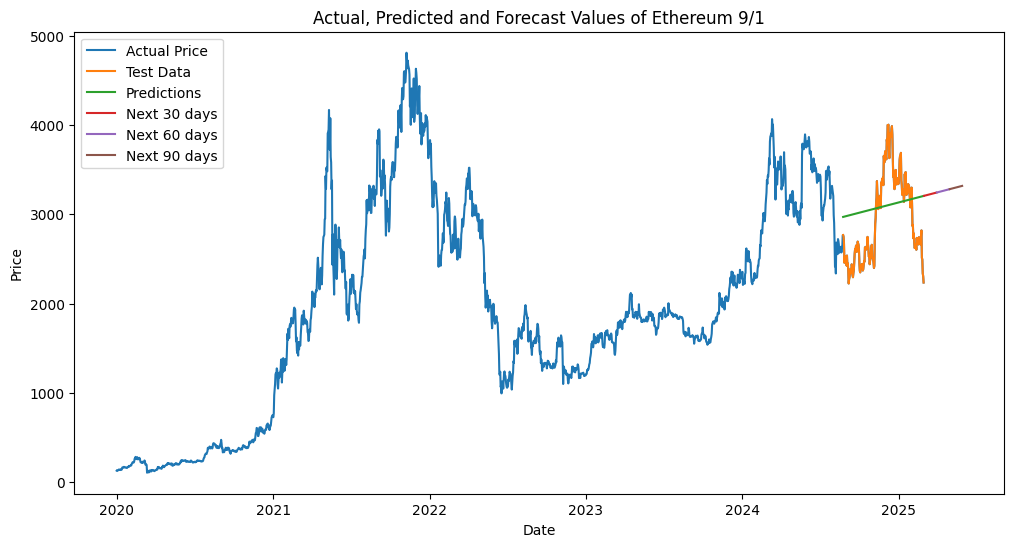

In [42]:
plt.figure(figsize=(12, 6))

# Vẽ dữ liệu thực tế
plt.plot(data_1['Date'], data_1['Price'], label='Actual Price')

# Vẽ dữ liệu test
plt.plot(test1['Date'], test1['Price'], label='Test Data')

# Vẽ kết quả dự đoán trên tập test
plt.plot(test1['Date'], predictions_1, label='Predictions')

# Vẽ 3 giai đoạn dự báo tiếp theo
plt.plot(future_dates_30_1, future_predictions_30_1, label='Next 30 days')
plt.plot(future_dates_60_1, future_predictions_60_1, label='Next 60 days')
plt.plot(future_dates_90_1, future_predictions_90_1, label='Next 90 days')

# Các thuộc tính đồ thị
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual, Predicted and Forecast Values of Ethereum 9/1')
plt.legend()
plt.show()

In [43]:
# RMSE: Sai số bình phương trung bình (căn bậc 2)
rmse1= np.sqrt(mean_squared_error(test1['Price'], predictions_1))

# MAPE: Sai số phần trăm tuyệt đối trung bình
mape1 = np.mean(np.abs((test1['Price'] - predictions_1) / test1['Price'])) * 100

# MSE: Sai số bình phương trung bình
mse1 = mean_squared_error(test1['Price'], predictions_1)

# In kết quả
print(f"RMSE: {rmse1:.4f}")
print(f"MAPE: {mape1:.2f}%")
print(f"MSE: {mse1:.4f}")

RMSE: 480.4706
MAPE: 15.22%
MSE: 230852.0276


Tải và chạy XRP Data

In [44]:
# Đọc dữ liệu từ file CSV
data_2 = pd.read_csv('XRP Historical Data.csv')

In [45]:
# Chuyển cột 'Date' sang định dạng datetime để dễ xử lý thời gian
data_2['Date'] = pd.to_datetime(data_2['Date'], format='%m/%d/%Y')

In [46]:
# Đảm bảo cột 'Price' có kiểu float (phòng trường hợp có định dạng chuỗi)
data_2['Price'] = data_2['Price'].astype(str).str.replace(',', '').astype(float)

In [47]:
# Sắp xếp dữ liệu theo ngày tăng dần và reset lại chỉ mục
data_2 = data_2.sort_values('Date').reset_index(drop=True)

XRP Data với tỷ lệ chia 7/3

In [48]:
# Chia dữ liệu:
train2 = data_2.iloc[:int(len(data_2) * 0.7)]
test2 = data_2.iloc[int(len(data_2) * 0.7):]

In [49]:
# Tạo và huấn luyện mô hình hồi quy tuyến tính
model2 = LinearRegression()
model2.fit(np.array(train2.index).reshape(-1, 1), train2['Price'])

LinearRegression()

In [50]:
# Dự đoán giá trên tập test
predictions_2 = model2.predict(np.array(test2.index).reshape(-1, 1))

In [51]:
# Dự báo 30 ngày tiếp theo kể từ ngày cuối cùng trong tập test
future_dates_30_2 = pd.date_range(start=test2['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_predictions_30_2 = model2.predict(np.array(np.arange(test2.index[-1] + 1, test2.index[-1] + 31)).reshape(-1, 1))

# Dự báo từ ngày thứ 31 đến ngày thứ 60 sau test
future_dates_60_2 = pd.date_range(start=test2['Date'].iloc[-1] + pd.Timedelta(days=31), periods=30, freq='D')
future_predictions_60_2 = model2.predict(np.array(np.arange(test2.index[-1] + 31, test2.index[-1] + 61)).reshape(-1, 1))

# Dự báo từ ngày thứ 61 đến 90 sau test
future_dates_90_2 = pd.date_range(start=test2['Date'].iloc[-1] + pd.Timedelta(days=61), periods=30, freq='D')
future_predictions_90_2 = model2.predict(np.array(np.arange(test2.index[-1] + 61, test2.index[-1] + 91)).reshape(-1, 1))

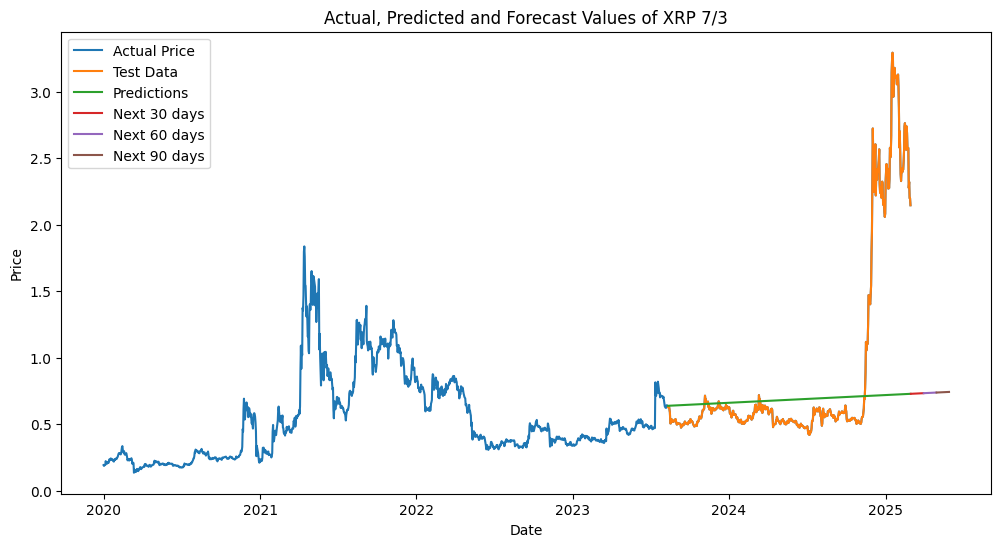

In [52]:
plt.figure(figsize=(12, 6))

# Vẽ dữ liệu thực tế
plt.plot(data_2['Date'], data_2['Price'], label='Actual Price')

# Vẽ dữ liệu test
plt.plot(test2['Date'], test2['Price'], label='Test Data')

# Vẽ kết quả dự đoán trên tập test
plt.plot(test2['Date'], predictions_2, label='Predictions')

# Vẽ 3 giai đoạn dự báo tiếp theo
plt.plot(future_dates_30_2, future_predictions_30_2, label='Next 30 days')
plt.plot(future_dates_60_2, future_predictions_60_2, label='Next 60 days')
plt.plot(future_dates_90_2, future_predictions_90_2, label='Next 90 days')

# Các thuộc tính đồ thị
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual, Predicted and Forecast Values of XRP 7/3')
plt.legend()
plt.show()

In [53]:
# RMSE: Sai số bình phương trung bình (căn bậc 2)
rmse2= np.sqrt(mean_squared_error(test2['Price'], predictions_2))

# MAPE: Sai số phần trăm tuyệt đối trung bình
mape2 = np.mean(np.abs((test2['Price'] - predictions_2) / test2['Price'])) * 100

# MSE: Sai số bình phương trung bình
mse2 = mean_squared_error(test2['Price'], predictions_2)

# In kết quả
print(f"RMSE: {rmse2:.4f}")
print(f"MAPE: {mape2:.2f}%")
print(f"MSE: {mse2:.4f}")

RMSE: 0.7589
MAPE: 31.06%
MSE: 0.5759


XRP Data với tỷ lệ chia 8/2

In [54]:
# Chia dữ liệu:
train2 = data_2.iloc[:int(len(data_2) * 0.8)]
test2 = data_2.iloc[int(len(data_2) * 0.8):]

In [55]:
# Tạo và huấn luyện mô hình hồi quy tuyến tính
model2 = LinearRegression()
model2.fit(np.array(train2.index).reshape(-1, 1), train2['Price'])

LinearRegression()

In [56]:
# Dự đoán giá trên tập test
predictions_2 = model2.predict(np.array(test2.index).reshape(-1, 1))

In [57]:
# Dự báo 30 ngày tiếp theo kể từ ngày cuối cùng trong tập test
future_dates_30_2 = pd.date_range(start=test2['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_predictions_30_2 = model2.predict(np.array(np.arange(test2.index[-1] + 1, test2.index[-1] + 31)).reshape(-1, 1))

# Dự báo từ ngày thứ 31 đến ngày thứ 60 sau test
future_dates_60_2 = pd.date_range(start=test2['Date'].iloc[-1] + pd.Timedelta(days=31), periods=30, freq='D')
future_predictions_60_2 = model2.predict(np.array(np.arange(test2.index[-1] + 31, test2.index[-1] + 61)).reshape(-1, 1))

# Dự báo từ ngày thứ 61 đến 90 sau test
future_dates_90_2 = pd.date_range(start=test2['Date'].iloc[-1] + pd.Timedelta(days=61), periods=30, freq='D')
future_predictions_90_2 = model2.predict(np.array(np.arange(test2.index[-1] + 61, test2.index[-1] + 91)).reshape(-1, 1))

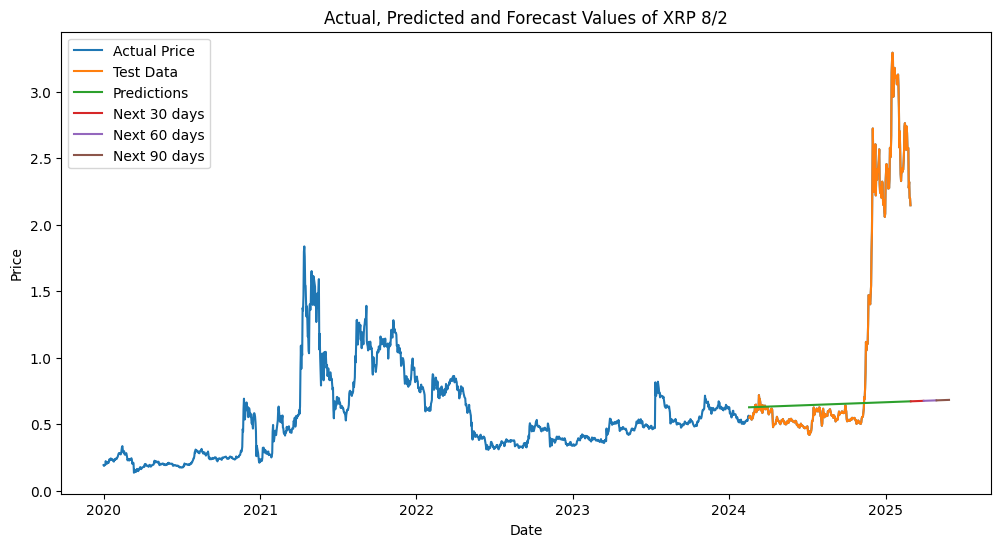

In [58]:
plt.figure(figsize=(12, 6))

# Vẽ dữ liệu thực tế
plt.plot(data_2['Date'], data_2['Price'], label='Actual Price')

# Vẽ dữ liệu test
plt.plot(test2['Date'], test2['Price'], label='Test Data')

# Vẽ kết quả dự đoán trên tập test
plt.plot(test2['Date'], predictions_2, label='Predictions')

# Vẽ 3 giai đoạn dự báo tiếp theo
plt.plot(future_dates_30_2, future_predictions_30_2, label='Next 30 days')
plt.plot(future_dates_60_2, future_predictions_60_2, label='Next 60 days')
plt.plot(future_dates_90_2, future_predictions_90_2, label='Next 90 days')

# Các thuộc tính đồ thị
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual, Predicted and Forecast Values of XRP 8/2')
plt.legend()
plt.show()

In [59]:
# RMSE: Sai số bình phương trung bình (căn bậc 2)
rmse2= np.sqrt(mean_squared_error(test2['Price'], predictions_2))

# MAPE: Sai số phần trăm tuyệt đối trung bình
mape2 = np.mean(np.abs((test2['Price'] - predictions_2) / test2['Price'])) * 100

# MSE: Sai số bình phương trung bình
mse2 = mean_squared_error(test2['Price'], predictions_2)

# In kết quả
print(f"RMSE: {rmse2:.4f}")
print(f"MAPE: {mape2:.2f}%")
print(f"MSE: {mse2:.4f}")

RMSE: 0.9500
MAPE: 32.59%
MSE: 0.9026


XRP Data với tỷ lệ chia 9/1

In [60]:
# Chia dữ liệu:
train2 = data_2.iloc[:int(len(data_2) * 0.9)]
test2 = data_2.iloc[int(len(data_2) * 0.9):]

In [61]:
# Tạo và huấn luyện mô hình hồi quy tuyến tính
model2 = LinearRegression()
model2.fit(np.array(train2.index).reshape(-1, 1), train2['Price'])

LinearRegression()

In [62]:
# Dự đoán giá trên tập test
predictions_2 = model2.predict(np.array(test2.index).reshape(-1, 1))

In [63]:
# Dự báo 30 ngày tiếp theo kể từ ngày cuối cùng trong tập test
future_dates_30_2 = pd.date_range(start=test2['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_predictions_30_2 = model2.predict(np.array(np.arange(test2.index[-1] + 1, test2.index[-1] + 31)).reshape(-1, 1))

# Dự báo từ ngày thứ 31 đến ngày thứ 60 sau test
future_dates_60_2 = pd.date_range(start=test2['Date'].iloc[-1] + pd.Timedelta(days=31), periods=30, freq='D')
future_predictions_60_2 = model2.predict(np.array(np.arange(test2.index[-1] + 31, test2.index[-1] + 61)).reshape(-1, 1))

# Dự báo từ ngày thứ 61 đến 90 sau test
future_dates_90_2 = pd.date_range(start=test2['Date'].iloc[-1] + pd.Timedelta(days=61), periods=30, freq='D')
future_predictions_90_2 = model2.predict(np.array(np.arange(test2.index[-1] + 61, test2.index[-1] + 91)).reshape(-1, 1))

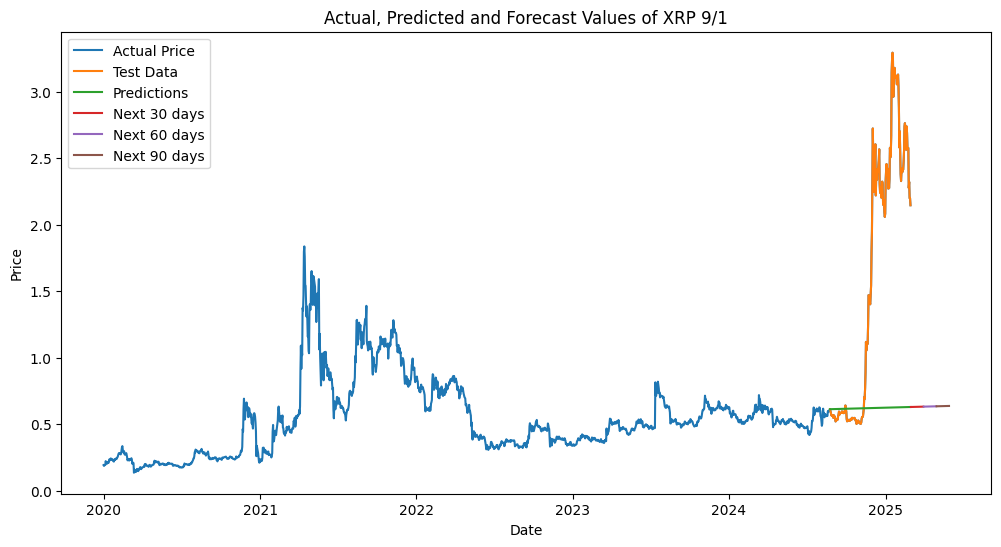

In [64]:
plt.figure(figsize=(12, 6))

# Vẽ dữ liệu thực tế
plt.plot(data_2['Date'], data_2['Price'], label='Actual Price')

# Vẽ dữ liệu test
plt.plot(test2['Date'], test2['Price'], label='Test Data')

# Vẽ kết quả dự đoán trên tập test
plt.plot(test2['Date'], predictions_2, label='Predictions')

# Vẽ 3 giai đoạn dự báo tiếp theo
plt.plot(future_dates_30_2, future_predictions_30_2, label='Next 30 days')
plt.plot(future_dates_60_2, future_predictions_60_2, label='Next 60 days')
plt.plot(future_dates_90_2, future_predictions_90_2, label='Next 90 days')

# Các thuộc tính đồ thị
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual, Predicted and Forecast Values of XRP 9/1')
plt.legend()
plt.show()

In [65]:
# RMSE: Sai số bình phương trung bình (căn bậc 2)
rmse2= np.sqrt(mean_squared_error(test2['Price'], predictions_2))

# MAPE: Sai số phần trăm tuyệt đối trung bình
mape2 = np.mean(np.abs((test2['Price'] - predictions_2) / test2['Price'])) * 100

# MSE: Sai số bình phương trung bình
mse2 = mean_squared_error(test2['Price'], predictions_2)

# In kết quả
print(f"RMSE: {rmse2:.4f}")
print(f"MAPE: {mape2:.2f}%")
print(f"MSE: {mse2:.4f}")

RMSE: 1.3660
MAPE: 45.36%
MSE: 1.8659
